<a href="https://colab.research.google.com/github/ReaganTiburan/Sales-Prediction/blob/main/Sales_Predection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive, Import Libraries, Load our Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo Project/Coding Dojo/02 Week 2: Pandas/03_Attachments/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## 1) How many rows and columns?

In [4]:
df.shape

(8523, 12)

# 2) What are the datatypes of each variable?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 3) Are there duplicates? If so, drop any duplicates.

In [6]:
df.duplicated().sum()

0

# 4) Identify missing values.

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

## Addressing Null Values on column 'Item_Weight'

In [9]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [10]:
df[df['Item_Identifier'] == 'FDP10'] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [11]:
filtered_df = df[df['Item_Weight'].notnull()] # filter all non-Null values at column 'Item_Weight'
filtered_df.info()
filtered_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


(7060, 12)

In [12]:
selected = filtered_df[['Item_Identifier','Item_Weight']] # Create a New DataFrame containing the 2 columns only.
selected.duplicated().sum()

5505

In [13]:
unique = selected.drop_duplicates(subset=['Item_Identifier', 'Item_Weight']) # delete duplicate values
unique.info()
unique.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 8471
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Identifier  1555 non-null   object 
 1   Item_Weight      1555 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.4+ KB


(1555, 2)

In [14]:
unique.set_index('Item_Identifier', inplace=True) # Assigning column 'Item_Identifier' as the Index
df['Temp']=df.Item_Identifier.map(unique.Item_Weight) # code for vlookup from two DataFrames
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


Check Temp Value Column is Added with Values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Temp                       8519 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [16]:
df[df['Temp'].isna()] # Filter NaN value at column N

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [17]:
df[['Temp']] = df[['Temp']].fillna(df.mean()) # Fill NaN value by fillna(mean) function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [18]:
# check the Item_Weight assigned mean value
df[df['Item_Identifier'] == 'FDN52']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,12.87542


In [19]:
# counter check how near our assigned mean value to the actual mean value by 'Item_Type'
df[df['Item_Type'] == 'Frozen Foods'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Item_Weight                    12.867061
Item_Visibility                 0.065645
Item_MRP                      138.503366
Outlet_Establishment_Year    1998.024533
Item_Outlet_Sales            2132.867744
Temp                           12.782512
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Temp                       8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [21]:
df.drop(['Item_Weight'], axis=1, inplace=True) # Drop column 'Item_Weight'

In [22]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [23]:
df.rename(columns = {'Temp':'Item_Weight'}, inplace = True) # Rename column 'Temp' to 'Item_Weight by dictionary key-value pairs.
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [24]:
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                     0
dtype: int64

## Addressing Null Values on column 'Outlet_Size'

Based on Below DataFrame we can confidently assume that if:

**'Outlet_Location_Type'** => *Tier 2* the corresponding **'Outlet_Size'** => 'Small'

LikeWise condfidently assume that if the:

 **Outlet_Type** =>* Grocery* Store the corresponding 'Outlet_Size' => 'Small'** 

**Therefore: we can increase our confident to assume that all Null/NaN values in the Outlet_Size => 'Small'**

In [25]:
outlet_notNull= df[df['Outlet_Size'].notnull()] # Filter non-Null values
#outlet_notNull.head()
outlet_notNull.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Size'])[['Outlet_Type']].count() # specify which column will be included to apply and aggregate function on

,,,,,Outlet_Type
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size,
OUT013,1987,Tier 3,Supermarket Type1,High,932
OUT018,2009,Tier 3,Supermarket Type2,Medium,928
OUT019,1985,Tier 1,Grocery Store,Small,528
OUT027,1985,Tier 3,Supermarket Type3,Medium,935
OUT035,2004,Tier 2,Supermarket Type1,Small,930
OUT046,1997,Tier 1,Supermarket Type1,Small,930
OUT049,1999,Tier 1,Supermarket Type1,Medium,930


In [26]:
outlet_isNUll= df[df['Outlet_Size'].isnull()] # Filter Null values
#outlet_isNUll.head()
outlet_isNUll.groupby(['Outlet_Location_Type','Outlet_Type'])[['Outlet_Type']].count() # specify which column will be included to apply and aggregate function on

,,Outlet_Type
Outlet_Location_Type,Outlet_Type,
Tier 2,Supermarket Type1,1855
Tier 3,Grocery Store,555


In [27]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small') # Fill the column 'Outlet_Size which contains NaN values with a string 'Small'
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  Item_Weight                8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 6) Confirm that there are no missing values after addressing them.

In [28]:
df.isna().sum() # Show that no NaN values in the DataFrame

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight                  0
dtype: int64

# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [29]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [30]:
df.groupby(['Item_Fat_Content']).sum()


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
Item_Fat_Content,,,,,
LF,21.054330,43857.1062,631348,6.552424e+05,4095.435000
Low Fat,326.541080,717390.8394,10167044,1.101503e+07,66033.805420
Regular,200.970026,409413.1214,5771667,6.457454e+06,36675.336261
low fat,7.313655,15071.7328,223539,2.338270e+05,1411.150000
reg,7.764190,15948.6810,233923,2.295765e+05,1521.480000


In [31]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [32]:
#df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat') 
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'},inplace=True) 

In [33]:
df.groupby(['Item_Fat_Content']).sum()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
Item_Fat_Content,,,,,
Low Fat,354.909065,776319.6784,11021931,1.190409e+07,71540.390420
Regular,208.734216,425361.8024,6005590,6.687031e+06,38196.816261


# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [34]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914,12.875420
std,0.051598,62.275067,8.371760,1706.499616,4.645008
min,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,0.026989,93.826500,1987.000000,834.247400,8.785000
50%,0.053931,143.012800,1999.000000,1794.331000,12.650000
75%,0.094585,185.643700,2004.000000,3101.296400,16.850000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000


# Project 1- Part 4 (Core) 

## Code and Graph below will show Total count of sold Item Type.
##It seems that Fruits and Vegetables are the most bought item.

In [35]:
# groupby columns
items = df.groupby(['Item_Type'])['Item_Outlet_Sales'].count().sort_values(ascending = False)
items

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Outlet_Sales, dtype: int64

In [36]:
# index
items.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object', name='Item_Type')

In [37]:
# values
items.values

array([1232, 1200,  910,  856,  682,  649,  648,  520,  445,  425,  251,
        214,  169,  148,  110,   64])

Code below will create a Barplot that will show wich Item Type is the most bought by costumers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


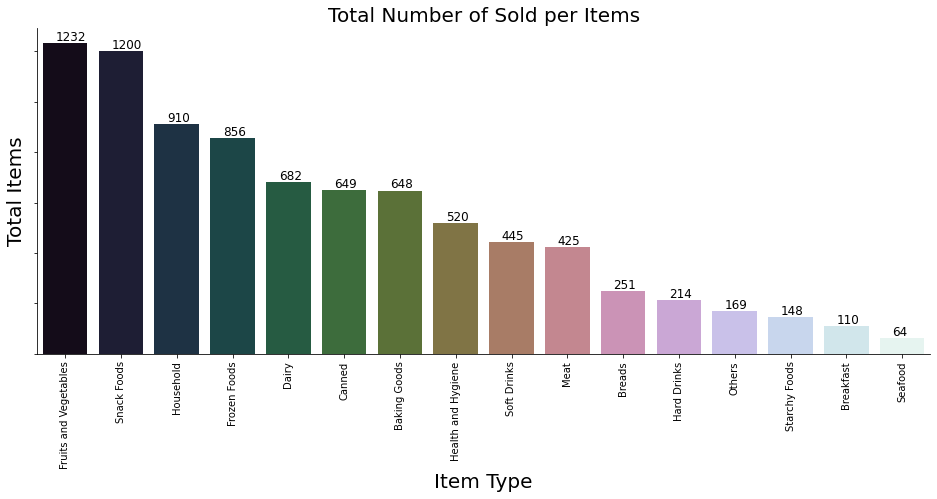

In [38]:
# Subplots and figure size
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16 ,6));
# Bar Graph
g = sns.barplot(items.index, items.values, palette = 'cubehelix');

# deal with the scientific notation
for i in ['top', 'right']:
    g.spines[i].set_visible(False);

# Display value at the top of the bar      
for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+10,
           round(i.get_height()),
           fontsize=12);
# Ticklabel format           
plt.ticklabel_format(style='plain', axis='y');
#xticks
plt.xticks(rotation = 90);
#xlabel
plt.xlabel('Item Type', fontsize = 20);
#ylabel
plt.ylabel('Total Items', fontsize = 20);
#yticklabel empty
g.set(yticklabels=[]);
#title
plt.title('Total Number of Sold per Items', fontsize = 20);

## Code and Graph below will show the Total sales percentage by Outlet Location and Outlet Type. From the Donut Graph below it shows that outlet location *Tier 2* and outlet type *Supermarket 1* has the highest sales combination.

In [39]:
# Groupby columns
pie = df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].sum()
pie

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.796941e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

Code below computes the sum of Sales per Outlet location and Type

In [40]:
# Filter
filter1 = (df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Grocery Store')
# sum of Column item Outlet Sales
t1_g1 = df[filter1]['Item_Outlet_Sales'].sum()
filter2 = (df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Supermarket Type1')
t1_sm1 = df[filter2]['Item_Outlet_Sales'].sum()
filter3 = (df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Type'] == 'Supermarket Type1')
t2_sm1 = df[filter3]['Item_Outlet_Sales'].sum()
filter4 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Grocery Store')
t3_g1 = df[filter4]['Item_Outlet_Sales'].sum()
filter5 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type1')
t3_sm1 = df[filter5]['Item_Outlet_Sales'].sum()
filter6 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type2')
t3_sm2 = df[filter6]['Item_Outlet_Sales'].sum()
filter7 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type2')
t3_sm3 = df[filter7]['Item_Outlet_Sales'].sum()

Code below compute the Total sum of Sales per Outlet Location Type.
As well make a LIST to be used as labels in our graph.

In [41]:
# Sum 
t1 = t1_g1 + t1_sm1
t2 = t2_sm1
t3 = t3_g1 + t3_sm1 + t3_sm2 + t3_sm3
# make List
sum_per_tier = [t1, t2, t3]

In [42]:
# make a List
sales_loc_type = [t1_g1, t1_sm1, t2_sm1, t3_g1, t3_sm1, t3_sm2, t3_sm3]

In [43]:
# make a List
rename = ['Grocery Store',
          'Supermarket Type1',
          'Supermarket Type1',
          'Grocery Store',
          'Supermarket Type',
          'Supermarket Type2',
          ' Supermarket Type3']

Code below will create a 2 Donut Chart that will show the total percentage of sales per Outlet Location Type and Outlet Type

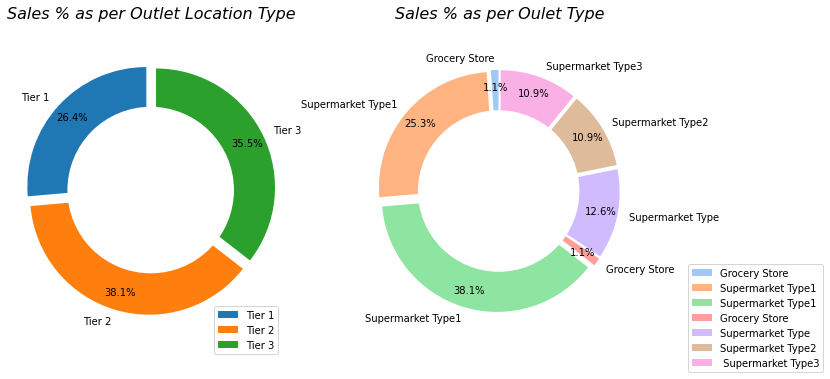

In [44]:
# Figure Size
plt.rcParams['figure.figsize'] = (10, 10)
# Subplot
plt.subplot(2, 2, 1)
# labels
labels = df['Outlet_Location_Type'].value_counts().sort_index()
tier_labels = labels.index
tier_labels
#colors
colors = sns.color_palette('tab10')
#explosion
explode = (0.05, 0.05, 0.05)
# Pie chart
plt.pie(sum_per_tier,
        labels = tier_labels,
        colors = colors,
        radius= 1,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        startangle = 90,
        explode = explode);
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
#legend location
plt.legend(loc = 4)
plt.title('Sales % as per Outlet Location Type', fontsize = 16, fontstyle = 'italic')


# Subplot
plt.subplot(2, 2, 2)
#colors
colors_outlet_type = sns.color_palette('pastel');
#explsion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05);
# Pie chart
plt.pie(sales_loc_type,
        labels = rename,
        colors=colors_outlet_type,
        radius= 1,
        autopct='%1.1f%%',
        pctdistance=0.85,
        startangle=90,
        explode = explode);
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white');
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
# legend location
plt.legend(bbox_to_anchor = (1.75, 0.3))
# Title 
plt.title('Sales % as per Oulet Type',
          fontsize = 16,
          fontstyle = 'italic');

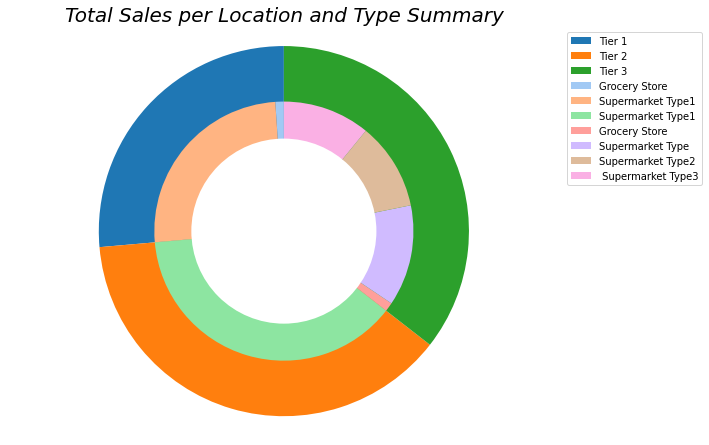

In [45]:
# Figure Size
plt.rcParams['figure.figsize'] = (8, 6)
# Colors
colors = sns.color_palette('tab10');
colors_outlet_type = sns.color_palette('pastel');
# labels
labels = ['Tier 1', 'Tier 2', 'Tier 3'];
# Plot
plt.pie(sum_per_tier,
        labels = tier_labels
        , labeldistance = None,
        colors = colors,
        radius = 1,
        textprops = {'color': 'k','fontsize': 20},
        startangle = 90,
        frame = True);
plt.pie(sales_loc_type,
        labels = rename,
        labeldistance = None,
        colors = colors_outlet_type,
        radius= 0.7,
        startangle = 90)
# Draw circle
centre_circle = plt.Circle((0,0),0.5,
                           color = 'black',
                           fc = 'white',
                           linewidth = 0);
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
 # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal');
plt.tight_layout();
# legend location
plt.legend(bbox_to_anchor = (1, 1));
# Title 
plt.title('Total Sales per Location and Type Summary',
          fontsize = 20,
          fontstyle = 'italic');
